<a href="https://colab.research.google.com/github/ajithbharadwaj1/Portfolio/blob/main/Company_Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import plotly.express as px
from fbprophet import Prophet
import yfinance as yf

In [32]:
company=yf.Ticker("TCS.NS")  # REPLACE THE COMPANY NAME AS REQUIRED

In [33]:
company_stock_price_data=company.history(period="max")
company_stock_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


In [34]:
company_stock_price_data.reset_index(inplace=True)

In [35]:
px.area(company_stock_price_data,x="Date",y="Close")

In [36]:
px.area(company_stock_price_data,x="Date",y="Volume")

In [37]:
columns=["Date","Close"]
new_data=pd.DataFrame(company_stock_price_data,columns=columns)

In [38]:
new_data.head()

,Date,Close
0,2002-08-12,29.519140
1,2002-08-13,29.119476
2,2002-08-14,27.111877
3,2002-08-15,27.111877
4,2002-08-16,27.046812


In [39]:
data_prophet=new_data.rename(columns={"Date":"ds","Close":"y"})

In [40]:
data_prophet.head()

,ds,y
0,2002-08-12,29.519140
1,2002-08-13,29.119476
2,2002-08-14,27.111877
3,2002-08-15,27.111877
4,2002-08-16,27.046812


In [41]:
m=Prophet()
m.fit(data_prophet)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [42]:
future=m.make_future_dataframe(periods=10) #REPLACE 10 WITH REQUIRED TIME IN DAYS
forecast=m.predict(future)

In [43]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2002-08-12,15.500218,-139.600902,154.334901,15.500218,15.500218,3.831668,3.831668,3.831668,-1.741877,-1.741877,-1.741877,5.573545,5.573545,5.573545,0.0,0.0,0.0,19.331886
1,2002-08-13,15.608675,-133.466467,161.689707,15.608675,15.608675,3.060961,3.060961,3.060961,-2.148327,-2.148327,-2.148327,5.209288,5.209288,5.209288,0.0,0.0,0.0,18.669636
2,2002-08-14,15.717133,-130.723320,153.928064,15.717133,15.717133,0.604236,0.604236,0.604236,-4.313503,-4.313503,-4.313503,4.917739,4.917739,4.917739,0.0,0.0,0.0,16.321369
3,2002-08-15,15.825591,-131.897316,167.195449,15.825591,15.825591,1.883809,1.883809,1.883809,-2.818651,-2.818651,-2.818651,4.702460,4.702460,4.702460,0.0,0.0,0.0,17.709400
4,2002-08-16,15.934049,-127.114950,154.375752,15.934049,15.934049,1.641687,1.641687,1.641687,-2.922988,-2.922988,-2.922988,4.564675,4.564675,4.564675,0.0,0.0,0.0,17.575736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4423,2021-08-02,2980.398213,2834.950136,3135.766436,2980.398213,2980.398213,9.205319,9.205319,9.205319,-1.741877,-1.741877,-1.741877,10.947195,10.947195,10.947195,0.0,0.0,0.0,2989.603531
4424,2021-08-03,2981.659701,2833.481623,3131.526998,2981.659701,2981.659701,8.282192,8.282192,8.282192,-2.148327,-2.148327,-2.148327,10.430519,10.430519,10.430519,0.0,0.0,0.0,2989.941893
4425,2021-08-04,2982.921189,2843.707999,3130.406511,2982.921189,2982.921189,5.555232,5.555232,5.555232,-4.313503,-4.313503,-4.313503,9.868734,9.868734,9.868734,0.0,0.0,0.0,2988.476421
4426,2021-08-05,2984.182678,2840.939355,3134.398530,2984.182678,2984.182678,6.457554,6.457554,6.457554,-2.818651,-2.818651,-2.818651,9.276205,9.276205,9.276205,0.0,0.0,0.0,2990.640231


In [44]:
px.line(forecast,x='ds',y='yhat')

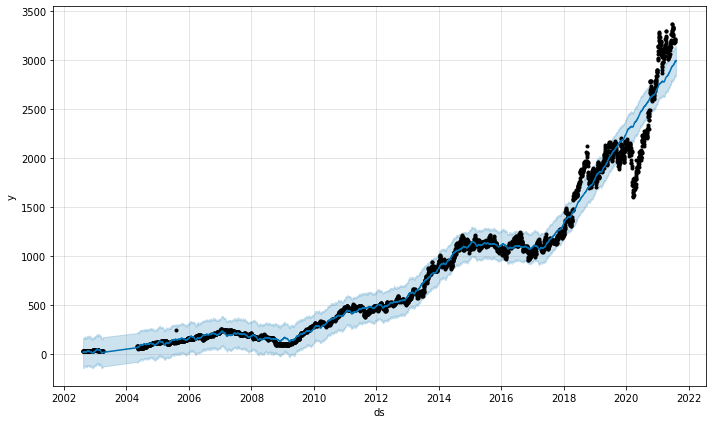

In [45]:
figure=m.plot(forecast,xlabel='ds',ylabel='y')

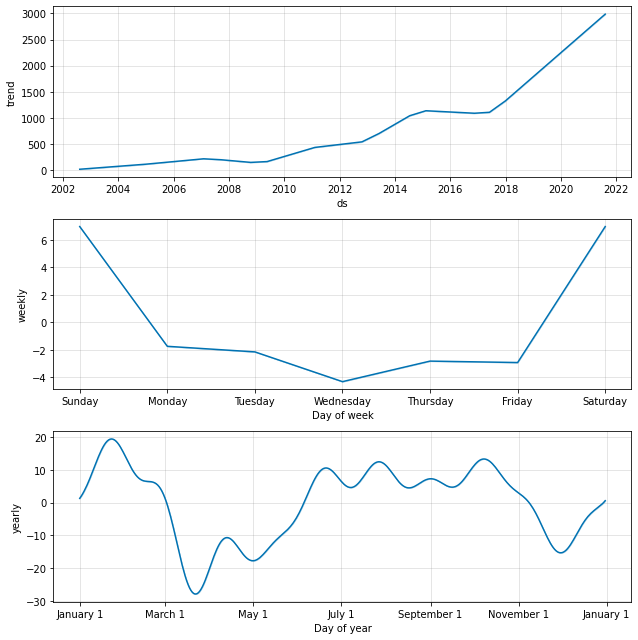

In [46]:
figure2=m.plot_components(forecast)